

# Project: Investigate a Dataset (No-Show Appointments of Medical!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment.


## Data Description

There are numbers of characteristics about the patient are included in each row:<br>
1- ScheduledDay’ tells us on what day the patient set up their appointment.<br>
2- Neighborhood’ indicates the location of the hospital.<br>
3- Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.<br>

## There is Question Used To Explore The Dataset:
1- What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?<br>




# Data Wrangling

loading data for check about cleanliness, trim and clean the dataset for analysis. I will make sure about my steps carefully.



In [183]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [184]:
# Load File Data 
Med_data = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
Med_data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [185]:
# Shape Of Data
Med_data.shape

(110527, 14)

Note About 110527 Rows And 14 columns

In [186]:
# Summary Of Data And Check Of Missing Values
Med_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


There are No Missing Values In Data File

In [187]:
# Describe Statistical Details About Data
Med_data.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


Statistical Details include:<br>
1- The mean Age of patients is 37<br>
2- there is a mistake about negative value of age column(-1)<br>

In [188]:
# View negative value
Med_data[Med_data['Age'] == -1]


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


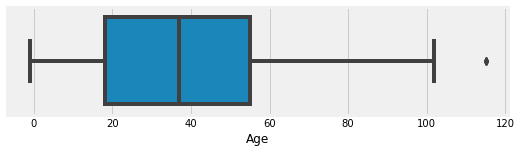

In [189]:
# Overview Of Age
plt.figure(figsize=(8,2))
sns.boxplot(x=Med_data.Age);

In [190]:
# Chech For Duplicates Values
Med_data.duplicated().sum()

0

There Are No Duplicates Values

In [191]:
# Inspecting About Duplicated "PatientId" In Data
Med_data["PatientId"].duplicated().sum()

48228

There Are Patients reserved More Than Once


In [192]:
# Inspecting About Number Of Patients With Same "No-Show" In Data
Med_data.duplicated(["PatientId", "No-show"]).sum()

38710

In [193]:
# Chech For Null Values
Med_data.isnull().sum().any()

False

There Are No Null Values

In [194]:
# Check About Unique Values In Data 
Med_data.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

<a id='Cleaning'></a>
# Data Cleaning
in this stage we will some steps:<br>



<a id='wrangling'></a>
 ## 1- Remove Negative Value


In [195]:
Med_data.drop(99832, axis=0, inplace = True)
Med_data.describe()


,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474934e+14,5.675304e+06,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,2.560943e+14,7.129544e+04,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172536e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680572e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.438963e+13,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


<a id='intro'></a>
## 2- Rename Columns Name From No-Show To No_Show To Overcome The Error

In [196]:
Med_data.rename(columns={"No-show" : "No_show"}, inplace=True)
Med_data.head(1)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


<a id='intro'></a>
## 3- Cleaning Duplicated Number Of Patient With Same "No_Sow"


In [197]:
Med_data.drop_duplicates(["PatientId", "No_show"], inplace=True)
Med_data.shape

(71816, 14)

<a id='intro'></a>
## 4-  Cleaning data by Removing "PatientId", "AppointmentID", "ScheduledDay", and "AppointmentDay" Columns.


In [198]:
Med_data.drop(["PatientId", "AppointmentID", "ScheduledDay", "AppointmentDay"], axis = 1, inplace=True)
Med_data.head()

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


<a id='eda'></a>
## Exploratory Data

The data has been cleaned. We are ready about exploration for computing statistics, create visualization and make Questions on it to extract some conclusions.


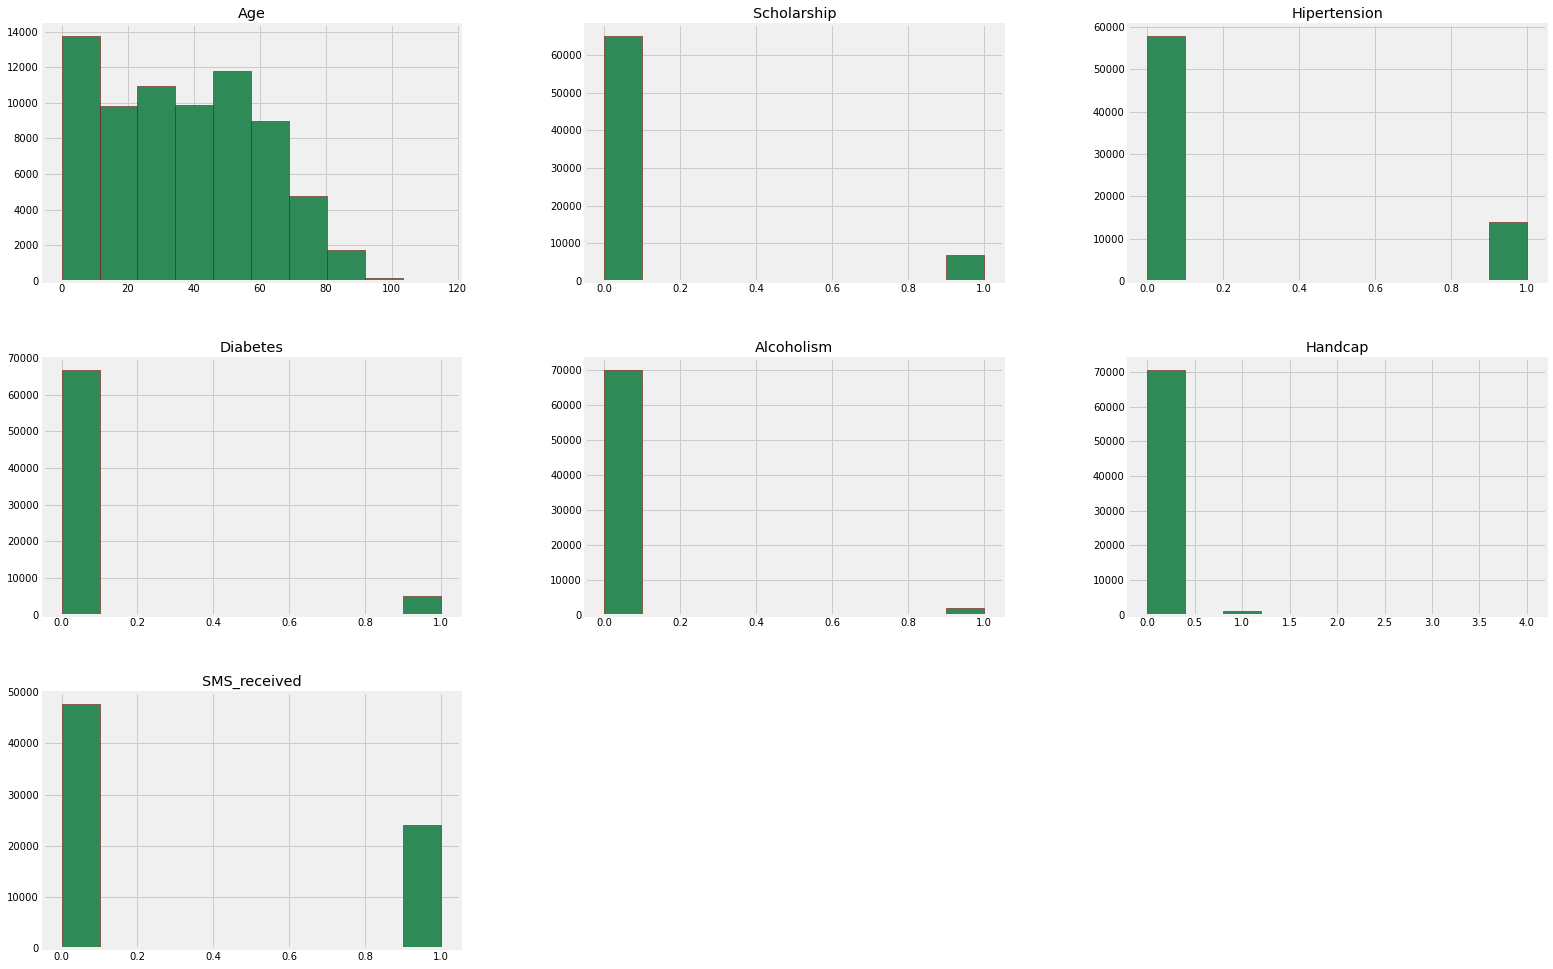

In [199]:
# General Visualization Review For Columns In Data
Med_data.hist(figsize=(24,17),edgecolor="maroon", color="seagreen" );


.Most Patients are non-alcoholic<br>
.Most of people don't suffer from chronic diseases<br>
.Most of people are not enrolled in Welfare program<br>
.Number of patients who recieved SMS is half the number who did not.<br>

In [200]:
#Spliting the data into Show and No-Show
show=Med_data.No_show =='No'
noshow=Med_data.No_show =='Yes'
Med_data[show].count(),Med_data[noshow].count()

(Gender           54153
 Age              54153
 Neighbourhood    54153
 Scholarship      54153
 Hipertension     54153
 Diabetes         54153
 Alcoholism       54153
 Handcap          54153
 SMS_received     54153
 No_show          54153
 dtype: int64,
 Gender           17663
 Age              17663
 Neighbourhood    17663
 Scholarship      17663
 Hipertension     17663
 Diabetes         17663
 Alcoholism       17663
 Handcap          17663
 SMS_received     17663
 No_show          17663
 dtype: int64)

Number Of Patients who Showed Is Greater Than Patients Not Showed

### Research Question 1  (What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?)

### . We Will Inspect Factors Which Impact On Patients Show For Their Scheduled Appointment Include:

## 1- Gender

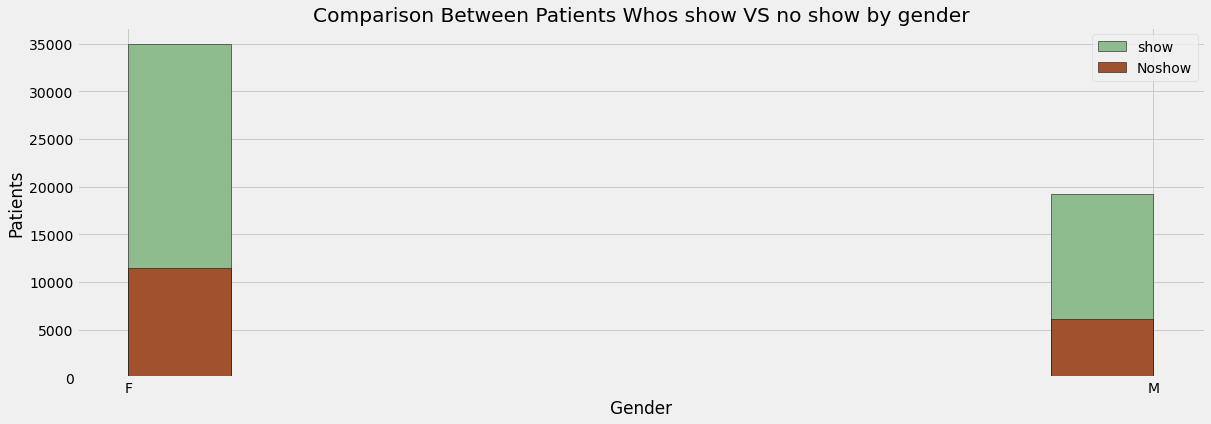

In [201]:
def plot_relation_gender(Med_data, column_descript, show, noshow):  
    plt.style.use("fivethirtyeight")
    color1 = "darkseagreen"
    color2 = "sienna"
    plt.figure(figsize=[18, 6])
    Med_data[column_descript][show].hist(alpha = 1.0,color = color1, label = "show", edgecolor="black" )
    Med_data[column_descript][noshow].hist(alpha = 1.0,color = color2, label = "Noshow", edgecolor="black")
    plt.legend()
    plt.title("Comparison Between Patients Whos show VS no show by gender")
    plt.xlabel("Gender")
    plt.ylabel("Patients")
plot_relation_gender(Med_data, "Gender", show, noshow);

In [202]:
# Viewing Patients Show VS Patients No Show By Gender
print(Med_data.Gender[show].value_counts()),print(Med_data.Gender[noshow].value_counts()),Med_data.groupby("Gender").No_show.value_counts()

F    34960
M    19193
Name: Gender, dtype: int64
F    11506
M     6157
Name: Gender, dtype: int64


(None,
 None,
 Gender  No_show
 F       No         34960
         Yes        11506
 M       No         19193
         Yes         6157
 Name: No_show, dtype: int64)

### Gender Is Insignificant factor.

## 2- Age

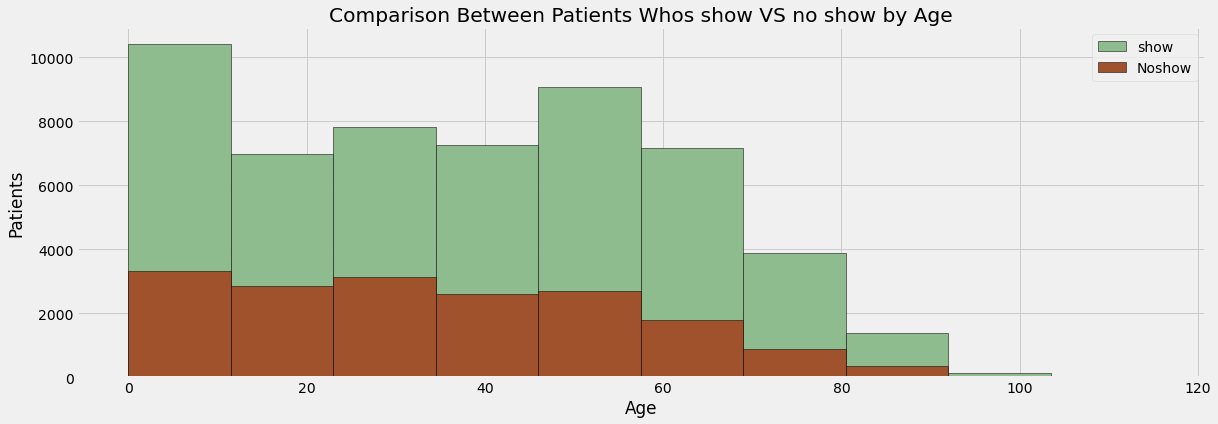

In [203]:
def plot_relation_age(Med_data, column_descript, show, noshow):  
    plt.style.use("fivethirtyeight")
    color1 = "darkseagreen"
    color2 = "sienna"
    plt.figure(figsize=[18, 6])
    Med_data[column_descript][show].hist(alpha = 1.0,color = color1, label = "show", edgecolor="black" )
    Med_data[column_descript][noshow].hist(alpha = 1.0,color = color2, label = "Noshow", edgecolor="black")
    plt.legend()
    plt.title("Comparison Between Patients Whos show VS no show by Age")
    plt.xlabel("Age")
    plt.ylabel("Patients")
plot_relation_age(Med_data, "Age", show, noshow);

In [204]:
# Viewing Patients Show VS Patients No Show By Age
print(Med_data.Age[show].value_counts()),print(Med_data.Age[noshow].value_counts()),Med_data.groupby("Age").No_show.value_counts()

0      1828
1      1245
2       967
3       838
57      810
       ... 
98        4
100       3
102       2
115       2
99        1
Name: Age, Length: 103, dtype: int64
0      573
1      369
17     293
19     291
22     287
      ... 
95       4
97       2
98       1
115      1
96       1
Name: Age, Length: 100, dtype: int64


(None,
 None,
 Age  No_show
 0    No         1828
      Yes         573
 1    No         1245
      Yes         369
 2    No          967
                 ... 
 99   No            1
 100  No            3
 102  No            2
 115  No            2
      Yes           1
 Name: No_show, Length: 203, dtype: int64)

### Age Is significant factor.

## 3- Sholarship

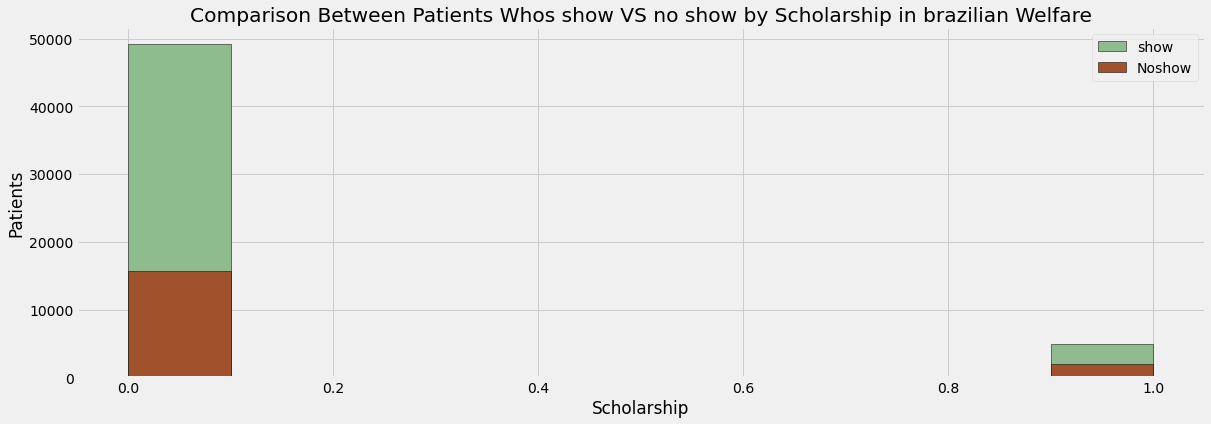

In [205]:
def plot_relation_scholarship(Med_data, column_descript, show, noshow):  
    plt.style.use("fivethirtyeight")
    color1 = "darkseagreen"
    color2 = "sienna"
    plt.figure(figsize=[18, 6])
    Med_data[column_descript][show].hist(alpha = 1.0,color = color1, label = "show", edgecolor="black" )
    Med_data[column_descript][noshow].hist(alpha = 1.0,color = color2, label = "Noshow", edgecolor="black")
    plt.legend()
    plt.title("Comparison Between Patients Whos show VS no show by Scholarship in brazilian Welfare")
    plt.xlabel("Scholarship")
    plt.ylabel("Patients")
plot_relation_scholarship(Med_data, "Scholarship", show, noshow);


In [206]:
# Viewing Patients Show VS Patients No Show By Scholarship Enrollment In Brazilian Welfare
print(Med_data.Scholarship[show].value_counts()),print(Med_data.Scholarship[noshow].value_counts()),Med_data.groupby("Scholarship").No_show.value_counts()

0    49207
1     4946
Name: Scholarship, dtype: int64
0    15748
1     1915
Name: Scholarship, dtype: int64


(None,
 None,
 Scholarship  No_show
 0            No         49207
              Yes        15748
 1            No          4946
              Yes         1915
 Name: No_show, dtype: int64)

### Scholarship in brazilian Welfare Is Insignificant factor.

## 4- Hipertension

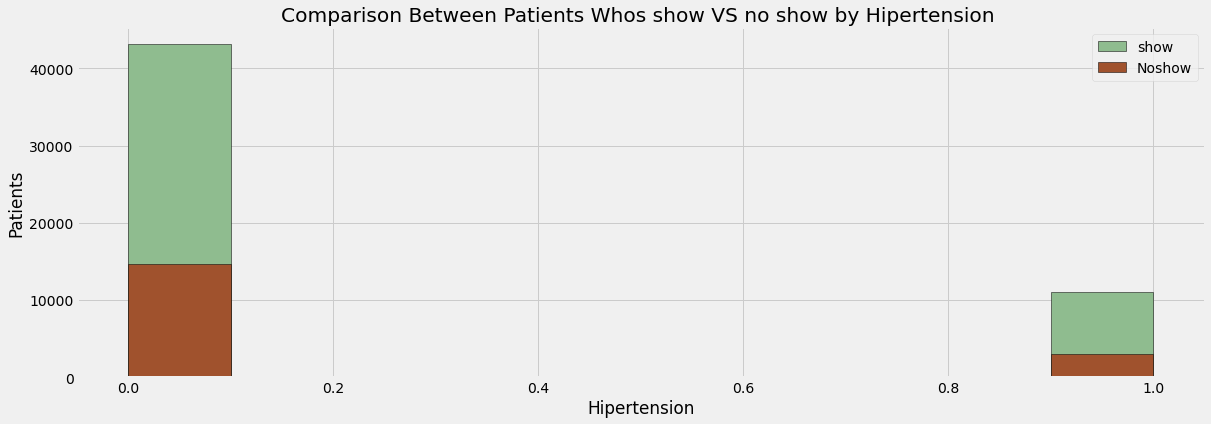

In [207]:
def plot_relation_Hipertension(Med_data, column_descript, show, noshow):  
    plt.style.use("fivethirtyeight")
    color1 = "darkseagreen"
    color2 = "sienna"
    plt.figure(figsize=[18, 6])
    Med_data[column_descript][show].hist(alpha = 1.0,color = color1, label = "show", edgecolor="black" )
    Med_data[column_descript][noshow].hist(alpha = 1.0,color = color2, label = "Noshow", edgecolor="black")
    plt.legend()
    plt.title("Comparison Between Patients Whos show VS no show by Hipertension ")
    plt.xlabel("Hipertension")
    plt.ylabel("Patients")
plot_relation_Hipertension(Med_data, "Hipertension", show, noshow);

In [208]:
# Viewing Patients Show VS Patients No Show By Hipertension
print(Med_data.Hipertension[show].value_counts()),print(Med_data.Hipertension[noshow].value_counts()),Med_data.groupby("Hipertension").No_show.value_counts()

0    43163
1    10990
Name: Hipertension, dtype: int64
0    14644
1     3019
Name: Hipertension, dtype: int64


(None,
 None,
 Hipertension  No_show
 0             No         43163
               Yes        14644
 1             No         10990
               Yes         3019
 Name: No_show, dtype: int64)

### Hipertension Is Insignificant factor.

## 5- Alcoholism

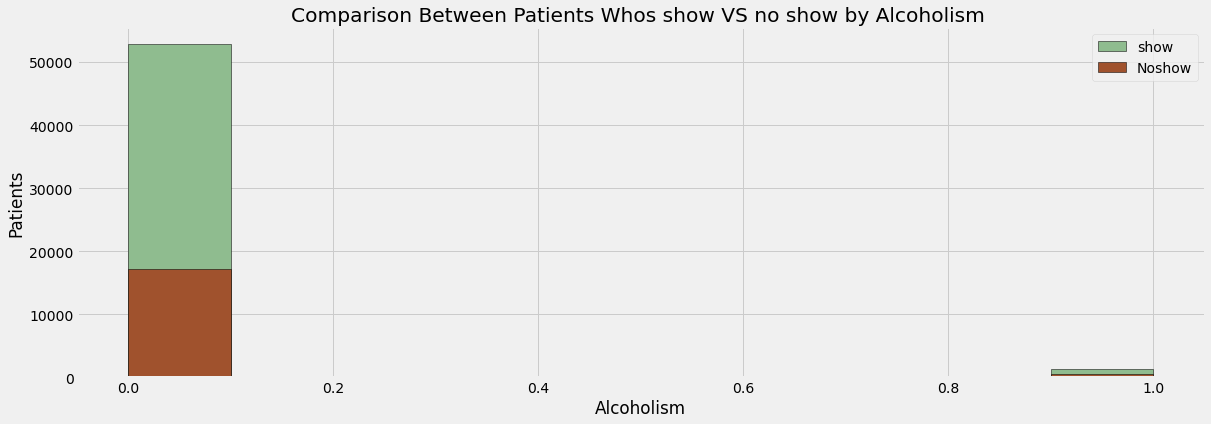

In [209]:
def plot_relation_Alcoholism(Med_data, column_descript, show, noshow):  
    plt.style.use("fivethirtyeight")
    color1 = "darkseagreen"
    color2 = "sienna"
    plt.figure(figsize=[18, 6])
    Med_data[column_descript][show].hist(alpha = 1.0,color = color1, label = "show", edgecolor="black" )
    Med_data[column_descript][noshow].hist(alpha = 1.0,color = color2, label = "Noshow", edgecolor="black")
    plt.legend()
    plt.title("Comparison Between Patients Whos show VS no show by Alcoholism ")
    plt.xlabel("Alcoholism")
    plt.ylabel("Patients")
plot_relation_Alcoholism(Med_data, "Alcoholism", show, noshow);

In [210]:
# Viewing Patients Show VS Patients No Show By Alcoholism
print(Med_data.Alcoholism[show].value_counts()),print(Med_data.Alcoholism[noshow].value_counts()),Med_data.groupby("Alcoholism").No_show.value_counts()

0    52875
1     1278
Name: Alcoholism, dtype: int64
0    17143
1      520
Name: Alcoholism, dtype: int64


(None,
 None,
 Alcoholism  No_show
 0           No         52875
             Yes        17143
 1           No          1278
             Yes          520
 Name: No_show, dtype: int64)

### Alcoholism Is Insignificant factor.

## 6- Diabetes

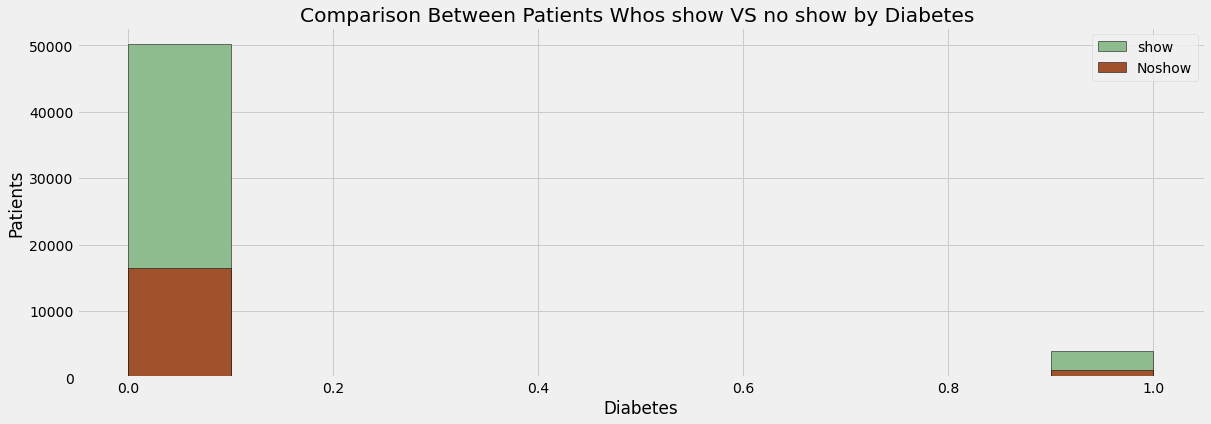

In [222]:
def plot_relation_Diabetes(Med_data, column_descript, show, noshow):  
    plt.style.use("fivethirtyeight")
    color1 = "darkseagreen"
    color2 = "sienna"
    plt.figure(figsize=[18, 6])
    Med_data[column_descript][show].hist(alpha = 1.0,color = color1, label = "show", edgecolor="black" )
    Med_data[column_descript][noshow].hist(alpha = 1.0,color = color2, label = "Noshow", edgecolor="black")
    plt.legend()
    plt.title("Comparison Between Patients Whos show VS no show by Diabetes ")
    plt.xlabel("Diabetes")
    plt.ylabel("Patients")
plot_relation_Diabetes(Med_data, "Diabetes", show, noshow);

In [212]:
# Viewing Patients Show VS Patients No Show By Diabetes
print(Med_data.Diabetes[show].value_counts()),print(Med_data.Diabetes[noshow].value_counts()),Med_data.groupby("Diabetes").No_show.value_counts()

0    50207
1     3946
Name: Diabetes, dtype: int64
0    16513
1     1150
Name: Diabetes, dtype: int64


(None,
 None,
 Diabetes  No_show
 0         No         50207
           Yes        16513
 1         No          3946
           Yes         1150
 Name: No_show, dtype: int64)

### Diabetes Is Insignificant factor.

## 7- Handcap	

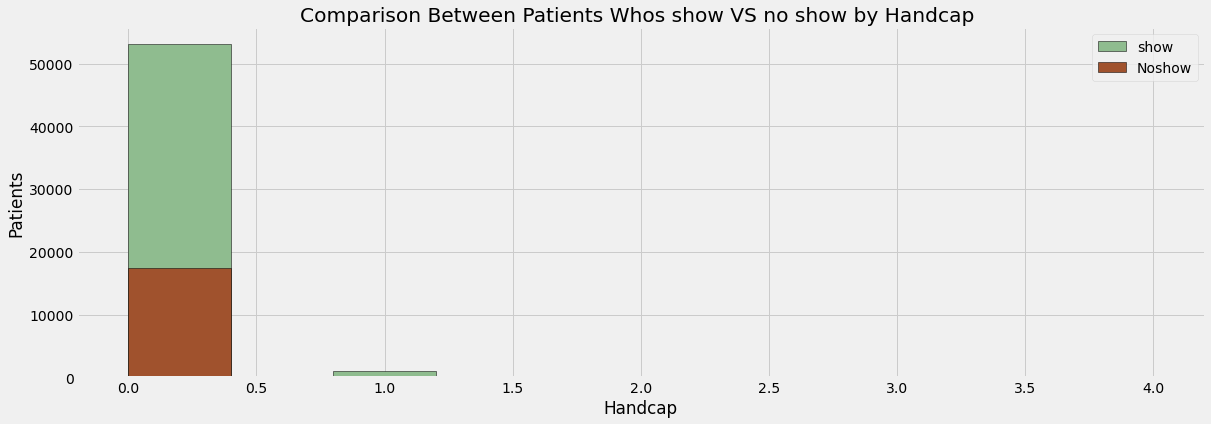

In [223]:
def plot_relation_Handcap(Med_data, column_descript, show, noshow):  
    plt.style.use("fivethirtyeight")
    color1 = "darkseagreen"
    color2 = "sienna"
    plt.figure(figsize=[18, 6])
    Med_data[column_descript][show].hist(alpha = 1.0,color = color1, label = "show", edgecolor="black" )
    Med_data[column_descript][noshow].hist(alpha = 1.0,color = color2, label = "Noshow", edgecolor="black")
    plt.legend()
    plt.title("Comparison Between Patients Whos show VS no show by Handcap ")
    plt.xlabel("Handcap")
    plt.ylabel("Patients")
plot_relation_Handcap(Med_data, "Handcap", show, noshow);

In [214]:
# Viewing Patients Show VS Patients No Show By Handcap
print(Med_data.Handcap[show].value_counts()),print(Med_data.Handcap[noshow].value_counts()),Med_data.groupby("Handcap").No_show.value_counts()

0    53126
1      931
2       89
3        5
4        2
Name: Handcap, dtype: int64
0    17385
1      247
2       27
3        3
4        1
Name: Handcap, dtype: int64


(None,
 None,
 Handcap  No_show
 0        No         53126
          Yes        17385
 1        No           931
          Yes          247
 2        No            89
          Yes           27
 3        No             5
          Yes            3
 4        No             2
          Yes            1
 Name: No_show, dtype: int64)

### Handcap Is Insignificant factor.

## 8- Neighbourhood	

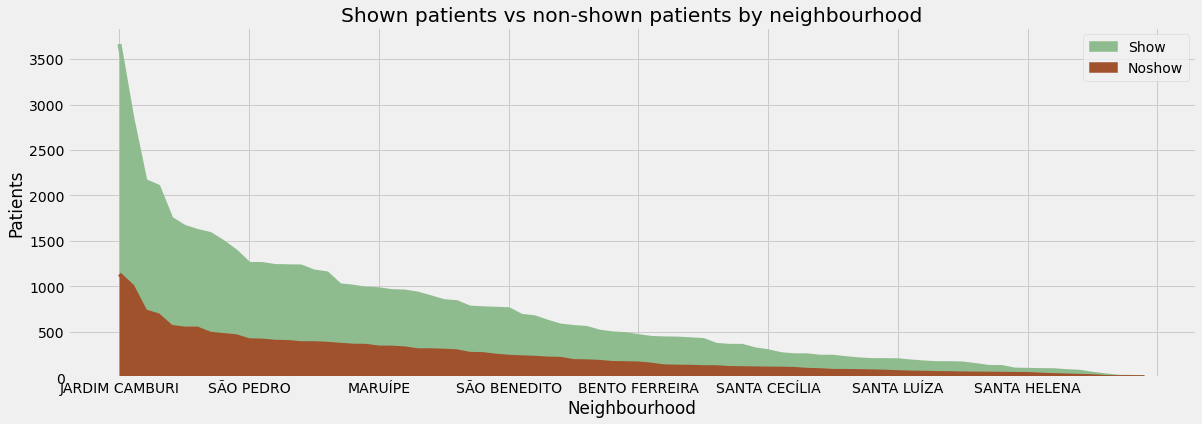

In [215]:
plt.figure(figsize=[18, 6])
Med_data.Neighbourhood[show].value_counts().plot (kind = "area", label = "Show",color= "darkseagreen")
Med_data.Neighbourhood[noshow].value_counts().plot (kind = "area", color = "sienna",  label = "Noshow")
plt.legend()
plt.title("Shown patients vs non-shown patients by neighbourhood")
plt.xlabel("Neighbourhood")
plt.ylabel("Patients");

In [216]:
# Viewing Patients Show VS Patients No Show By Neighbourhood
print(Med_data.Neighbourhood[show].value_counts()),print(Med_data.Neighbourhood[noshow].value_counts()),Med_data.groupby("Neighbourhood").No_show.value_counts()

JARDIM CAMBURI       3666
MARIA ORTIZ          2845
JARDIM DA PENHA      2160
RESISTÊNCIA          2098
ITARARÉ              1745
                     ... 
PONTAL DE CAMBURI      38
ILHA DO BOI            21
AEROPORTO               6
ILHA DO FRADE           4
PARQUE INDUSTRIAL       1
Name: Neighbourhood, Length: 80, dtype: int64
JARDIM CAMBURI                 1134
MARIA ORTIZ                    1000
ITARARÉ                         725
RESISTÊNCIA                     682
CENTRO                          555
                               ... 
PONTAL DE CAMBURI                12
ILHA DO BOI                       3
ILHAS OCEÂNICAS DE TRINDADE       2
ILHA DO FRADE                     2
AEROPORTO                         1
Name: Neighbourhood, Length: 80, dtype: int64


(None,
 None,
 Neighbourhood    No_show
 AEROPORTO        No           6
                  Yes          1
 ANDORINHAS       No         997
                  Yes        369
 ANTÔNIO HONÓRIO  No         155
                            ... 
 TABUAZEIRO       Yes        465
 UNIVERSITÁRIO    No          82
                  Yes         24
 VILA RUBIM       No         475
                  Yes        117
 Name: No_show, Length: 160, dtype: int64)

### Neighbourhood Is significant factor.

## 9- SMS received

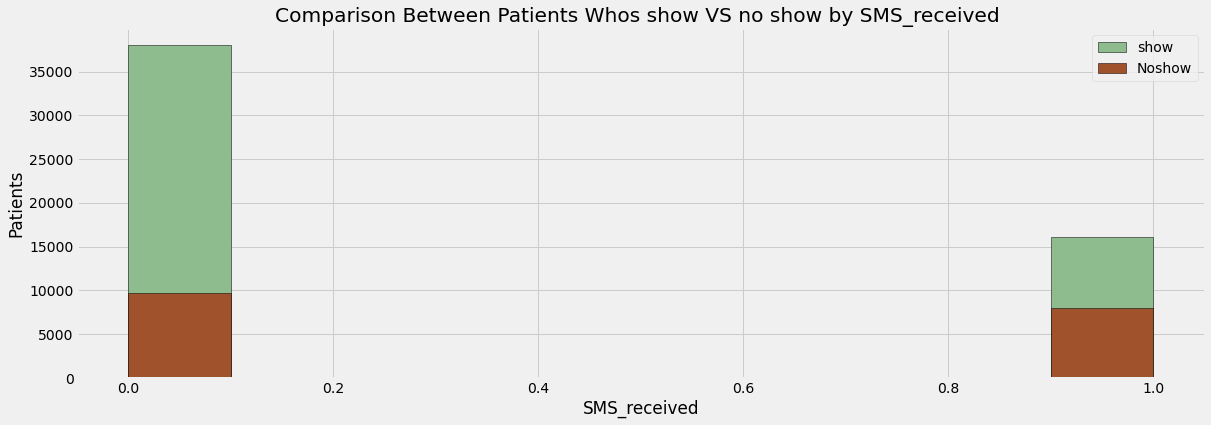

In [225]:
def plot_relation_SMS_received(Med_data, column_descript, show, noshow):  
    plt.style.use("fivethirtyeight")
    color1 = "darkseagreen"
    color2 = "sienna"
    plt.figure(figsize=[18, 6])
    Med_data[column_descript][show].hist(alpha = 1.0,color = color1, label = "show", edgecolor="black" )
    Med_data[column_descript][noshow].hist(alpha = 1.0,color = color2, label = "Noshow", edgecolor="black")
    plt.legend()
    plt.title("Comparison Between Patients Whos show VS no show by SMS_received ")
    plt.xlabel("SMS_received")
    plt.ylabel("Patients")
plot_relation_SMS_received(Med_data, "SMS_received", show, noshow);

In [218]:
# Viewing Patients Show VS Patients No Show By SMS received
print(Med_data.SMS_received[show].value_counts()),print(Med_data.Neighbourhood[noshow].value_counts()),Med_data.groupby("SMS_received").No_show.value_counts()

0    38057
1    16096
Name: SMS_received, dtype: int64
JARDIM CAMBURI                 1134
MARIA ORTIZ                    1000
ITARARÉ                         725
RESISTÊNCIA                     682
CENTRO                          555
                               ... 
PONTAL DE CAMBURI                12
ILHA DO BOI                       3
ILHAS OCEÂNICAS DE TRINDADE       2
ILHA DO FRADE                     2
AEROPORTO                         1
Name: Neighbourhood, Length: 80, dtype: int64


(None,
 None,
 SMS_received  No_show
 0             No         38057
               Yes         9660
 1             No         16096
               Yes         8003
 Name: No_show, dtype: int64)

### SMS received Is significant factor.

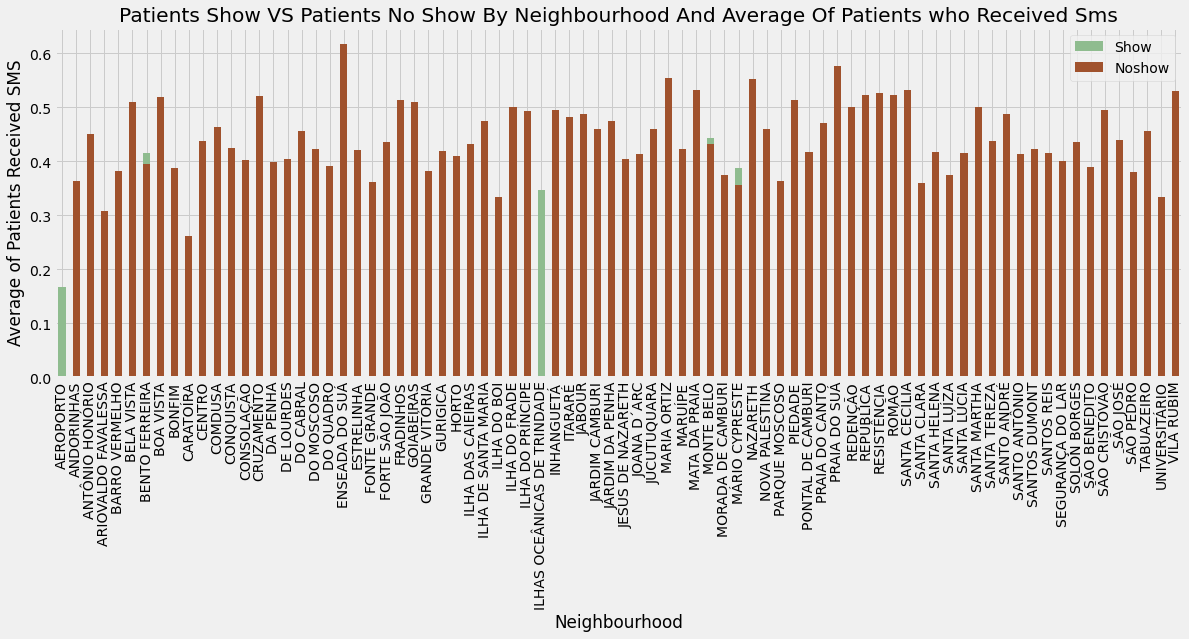

In [219]:
# Viewing Patients Show VS Patients No Show By Neighbourhood And Average Of Patients who Received SMS
plt.figure(figsize=[18, 6])
Med_data[show].groupby("Neighbourhood").SMS_received.mean().plot (kind = "bar", label = "Show", color="darkseagreen")
Med_data[noshow].groupby("Neighbourhood").SMS_received.mean().plot (kind = "bar", label = "Noshow",color="sienna")
plt.legend()
plt.title("Patients Show VS Patients No Show By Neighbourhood And Average Of Patients who Received Sms")
plt.xlabel("Neighbourhood")
plt.ylabel("Average of Patients Received SMS");

### Neighbourhood And Sms Received Are significant factors in TWO neighbourhoods.


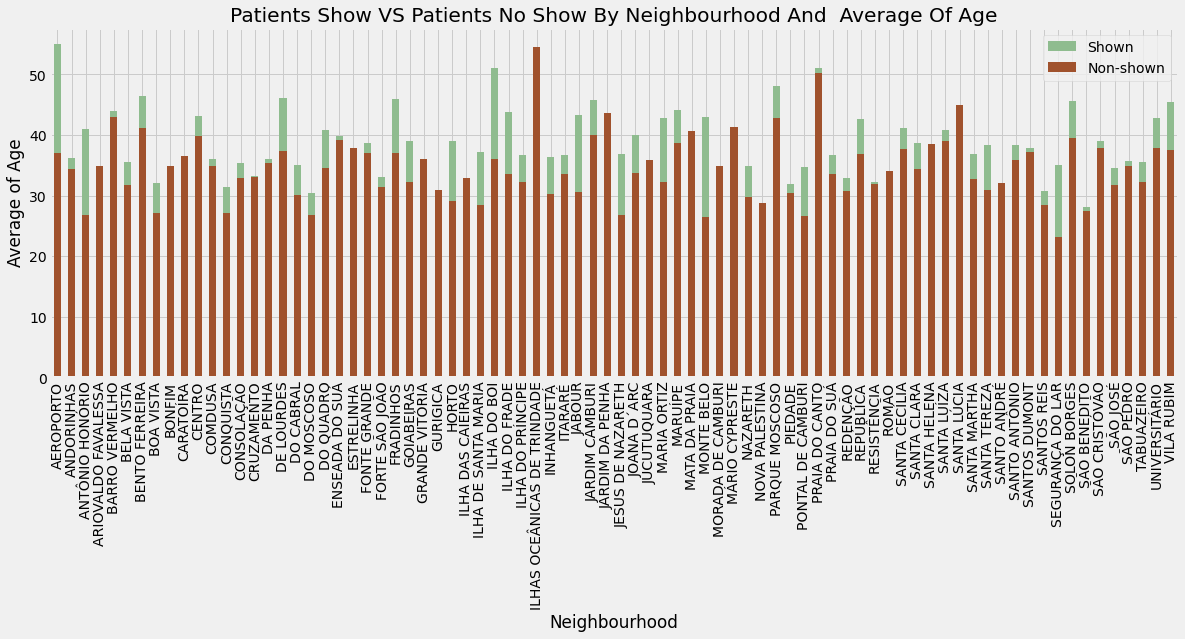

In [226]:
# Viewing Patients Show VS Patients No Show By Neighbourhood And Average Of Age
plt.figure(figsize=[18, 6])
Med_data[show].groupby("Neighbourhood").Age.mean().plot (kind = "bar", label = "Shown",color="darkseagreen")
Med_data[noshow].groupby("Neighbourhood").Age.mean().plot (kind = "bar", color="sienna",  label = "Non-shown")
plt.legend()
plt.title("Patients Show VS Patients No Show By Neighbourhood And  Average Of Age")
plt.xlabel("Neighbourhood")
plt.ylabel("Average of Age");

### Neighbourhood And Age Are significant factors

<a id='conclusions'></a>
## Conclusions

#### 1-There are Insignificant Factors Don't Affect prediction About Patients.

#### 2- There are significant Factors That Affect On Patients Show About Their Scheduled Appointments Include :<br>

#### ► Age : Patients In Age Category Between 0 : 10 Has Most Show Rate Followed By Age Category Between 35 : 75.<br> 

#### ►Neighbourhood : Patients From JARDIM CANBURI Are The Most Show For Their Scheduled Appointments with 6252 

#### Patients,While AEROPORTO Has No Patients Whom Attend to Their Scheduled Appointments This is Most significant Factor<br>

#### ►Sms Received : Patients Received Sms In Two Neighbourhoodwere shown up for their scheduled appointments.  an Outsider

#### correlation Has been noticed with SMS_received; a significant number of patients have attended their scheduled appointments 

####  without receiving SMS 



 

## Limitation

### There Are No Direct Realation Was Discovered Between Show VS noshow And Other Properties Such As 

### gender, scholarship enrollment, hypertension, diabetes, alcoholism, and handicap.

In [221]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

4294967295